In [1]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from config import gkey

%matplotlib notebook

In [2]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
#build payload
#set parameters
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2014-09-09', geo='US-CA',gprop='')

In [4]:
#pytrends.interest_by_region(resolution = 'CITY')

In [5]:
tesla_searches = pytrends.interest_over_time()

tesla_searches.head()

,Tesla,isPartial
date,,
2013-09-15,68,False
2013-09-22,70,False
2013-09-29,100,False
2013-10-06,70,False
2013-10-13,64,False


In [6]:
tesla_array = tesla_searches["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

52

In [7]:
tesla_df = tesla_searches.drop(columns= "isPartial")

tesla_df.head()

,Tesla
date,
2013-09-15,68
2013-09-22,70
2013-09-29,100
2013-10-06,70
2013-10-13,64


Text(0,0.5,'% of Searches')

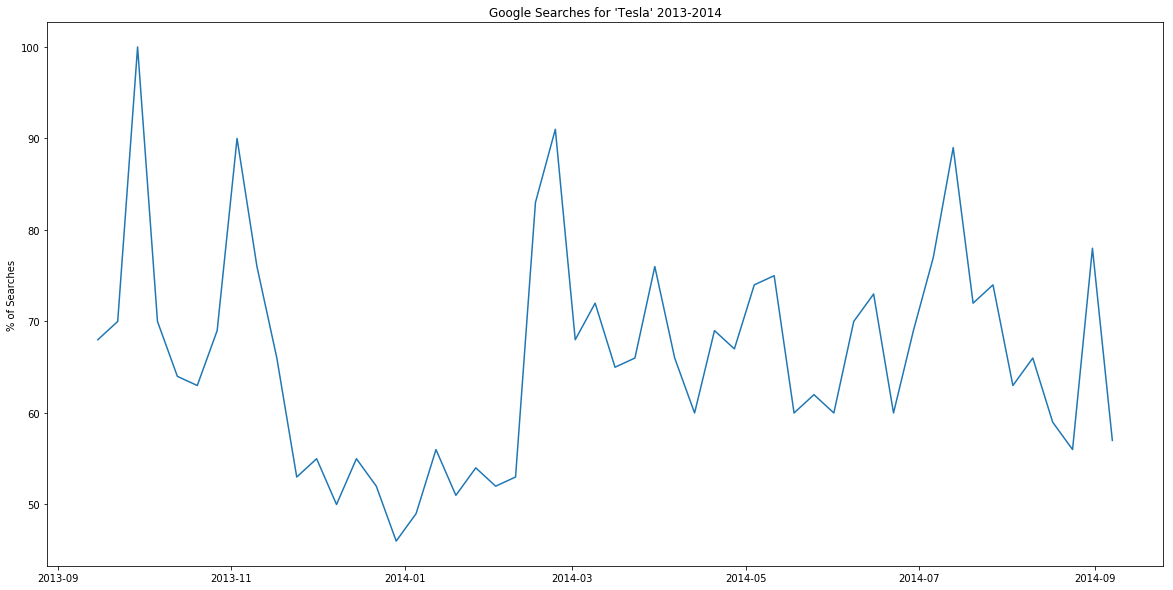

In [22]:
plt.figure(figsize=(20,10))
plt.plot(tesla_df)
plt.title("Google Searches for 'Tesla' 2013-2014")
plt.ylabel("% of Searches")

In [9]:
#pull the same data for 'Prius'

In [23]:
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2014-09-09', geo='US-CA',gprop='')

In [24]:
prius_searches = pytrends.interest_over_time()

prius_searches.head()

,Prius,isPartial
date,,
2013-09-15,74,False
2013-09-22,69,False
2013-09-29,71,False
2013-10-06,76,False
2013-10-13,70,False


In [25]:
#append Prius Google search popularity to a list
prius_array = prius_searches["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

52

In [26]:
prius_df = prius_searches.drop(columns= "isPartial")

prius_df.head()

,Prius
date,
2013-09-15,74
2013-09-22,69
2013-09-29,71
2013-10-06,76
2013-10-13,70


Text(0,0.5,'% of Searches')

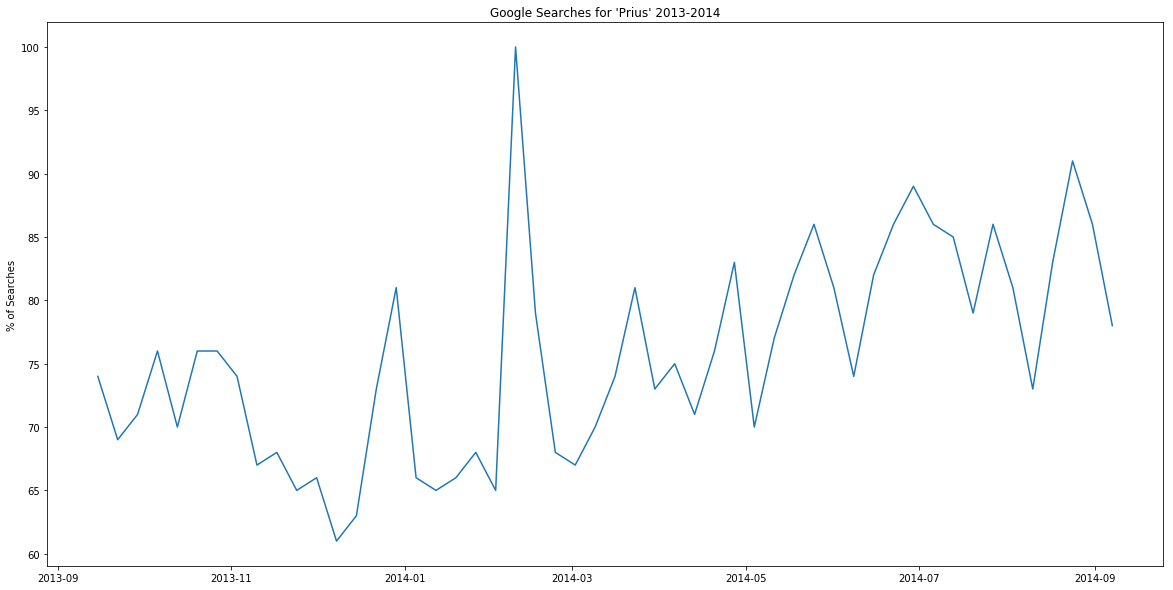

In [28]:
plt.figure(figsize=(20,10))
plt.plot(prius_df)
plt.title("Google Searches for 'Prius' 2013-2014")
plt.ylabel("% of Searches")

In [15]:
#pull the same data for 'Electric car'

In [29]:
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2014-09-09', geo='US-CA',gprop='')

In [30]:
ecar_searches = pytrends.interest_over_time()

ecar_searches.head()

,Electric car,isPartial
date,,
2013-09-15,99,False
2013-09-22,90,False
2013-09-29,85,False
2013-10-06,74,False
2013-10-13,74,False


In [31]:
ecar_array = ecar_searches["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

52

In [32]:
ecar_df = ecar_searches.drop(columns= "isPartial")

ecar_df.head()

,Electric car
date,
2013-09-15,99
2013-09-22,90
2013-09-29,85
2013-10-06,74
2013-10-13,74


Text(0,0.5,'% of Searches')

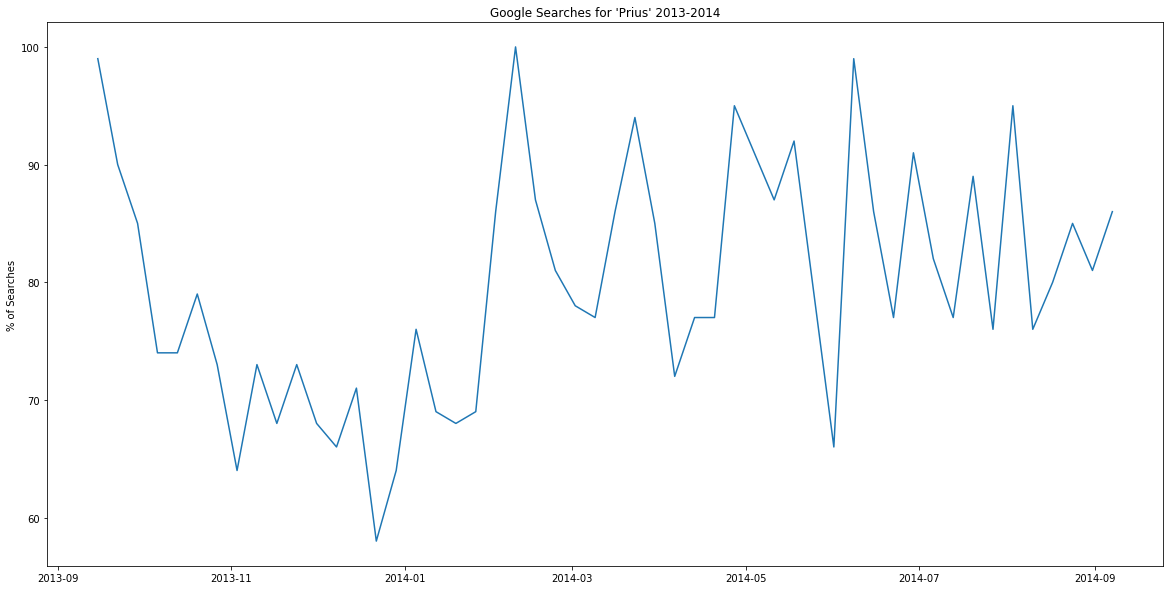

In [33]:
plt.figure(figsize=(20,10))
plt.plot(ecar_df)
plt.title("Google Searches for 'Prius' 2013-2014")
plt.ylabel("% of Searches")

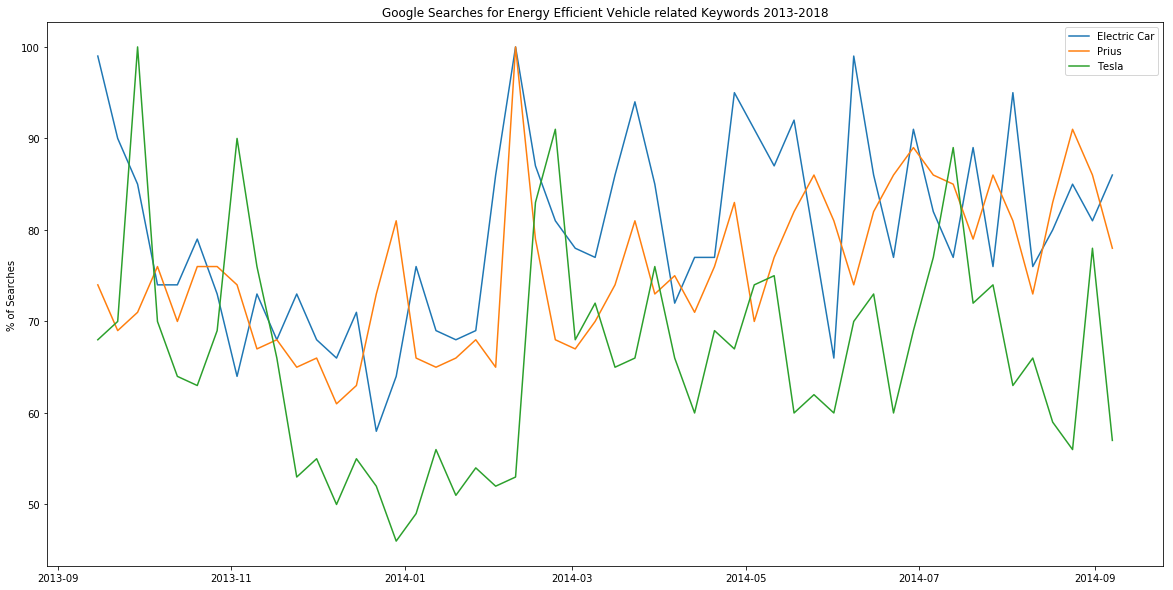

In [34]:
plt.figure(figsize=(20,10))
ecar, = plt.plot(ecar_df)
prius, = plt.plot(prius_df)
tesla, = plt.plot(tesla_df)
plt.title("Google Searches for Energy Efficient Vehicle related Keywords 2013-2018")
plt.ylabel("% of Searches")
plt.legend((ecar, prius, tesla),("Electric Car","Prius","Tesla"))

In [37]:
#import gas prices data
ca_weekly = pd.read_csv("Resources/weekly_gas_prices_ca_2.csv")
ca_weekly = ca_weekly.set_index("Date")
ca_weekly = ca_weekly.dropna()

#locate data for 2018
ca_weekly_2018 = ca_weekly.loc["2013-09-16":"2014-09-08",:]
ca_weekly_2018.head()

,Price
Date,
2013-09-16,4.096
2013-09-23,4.052
2013-09-30,3.980
2013-10-07,3.898
2013-10-14,3.840


In [38]:
#save the gas price values into a list
gas_array = ca_weekly_2018["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

52

In [39]:
#build a dataframe with the lists 
comparison_df = ca_weekly_2018.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)
#multiply gas price by 10 
comparison_df['Price'] = comparison_df['Price']*10
comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-09-16,40.96,68,99,74
2013-09-23,40.52,70,90,69
2013-09-30,39.80,100,85,71
2013-10-07,38.98,70,74,76
2013-10-14,38.40,64,74,70


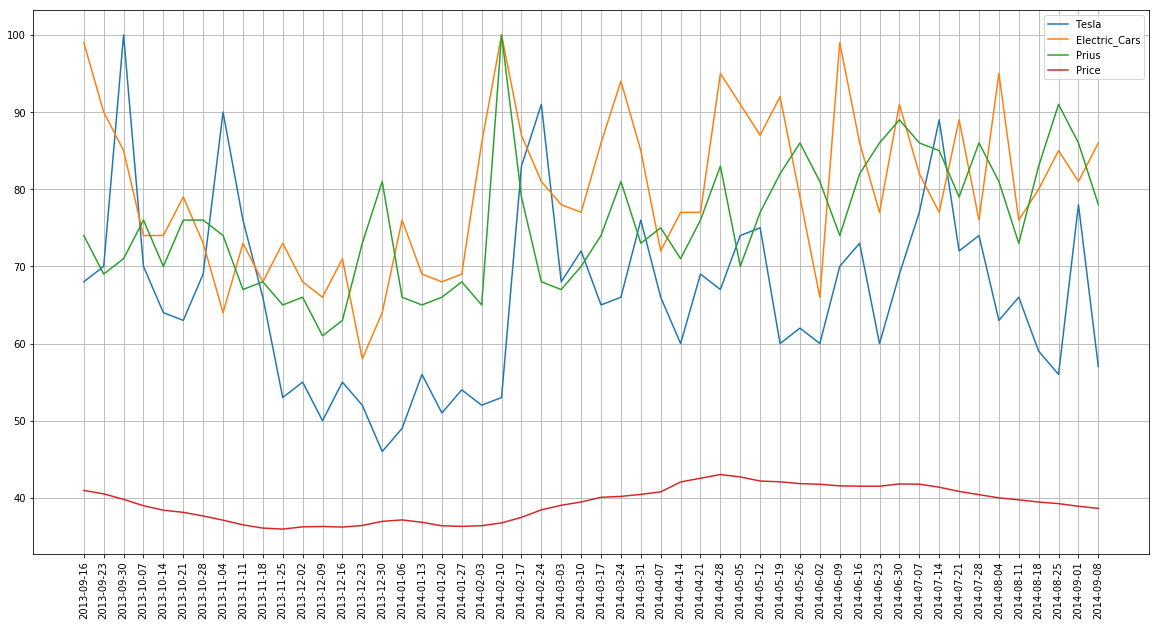

In [41]:
plt.figure(figsize=(20,10))
#plot each line individually for better legends
plt.plot(comparison_df["Tesla"])
plt.plot(comparison_df["Electric_Cars"])
plt.plot(comparison_df["Prius"])
plt.plot(comparison_df["Price"])
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.savefig("Images/trends_gasprice_comparison_pastyear.png")

In [48]:
#dict_ = {"Tesla": tesla_df["Tesla"],
        #"Electric Car": ecar_df["Electric car"],
        #"Prius": prius_df["Prius"],
        #"Gas Price": ca_weekly_2018["Price"]}

#combined_df = pd.DataFrame(dict_,index=None)
#combined_df.head()
#dict_["Gas Price"]